# SENSTIVITY ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from itertools import permutations
import warnings
warnings.filterwarnings("ignore")

In [2]:
## DEFINING HELPER FUNCTIONS FOR NORMALIZATION
def minNormalize(values):
    values = list(values)
    goal = values.pop(-1)
    normal = [9*((max(values)-x)/(max(values)-min(values)))+1 for x in values]
    normal.append(goal)
    return normal

def maxNormalize(values):
    values = list(values)
    goal = values.pop(-1)
    normal = [9*((x-min(values))/(max(values)-min(values)))+1 for x in values]
    normal.append(goal)
    return normal

def normalize(values):
    if values.iloc[-1] == 'MAX':
        normal = maxNormalize(values)
    else:
        normal = minNormalize(values)
    return normal

## DEFINING HELPER FUNCTION FOR GETTING WEIGHTED SUM
def getWeightedSum(values):
    values = list(values)
    weight = values.pop(0)
    values = [value*weight for value in values]
    values.insert(0, weight)
    return values

def getTotal(values):
    return sum(values)

## SINGLE EXECUTION

In [62]:
criteria = ['Accuracy','Training Time','Model Size','Image Size','Processing Power']
levelOfImportance = [10,7,8,6,9]
weight = [(level/sum(levelOfImportance)) for level in levelOfImportance]
inceptionv3 = [93.7,36.0,92.0,89401.0,42.2]
efficientnetv2 = [91.3,48.0,4.9,50176.0,51.2]
mobilenetv3 = [97.5,72.0,479,50176.0,1010.0]
goal = ['MAX','MIN','MIN','MIN','MIN'] #'MIN','MIN','MAX','MIN','MAX'

In [63]:
data = pd.DataFrame({'levelOfImportance':levelOfImportance,
                     'weight':weight,
                     'Inception_V3':inceptionv3,
                     'EfficientNet_v2':efficientnetv2,
                     'MobileNet_V3':mobilenetv3,
                     },
                     index = criteria)
data.index.name='criteria'
data = data.map(lambda x: float(x))
data['goal'] = goal

In [64]:
## NORMALIZING DATA
for i in range(data.shape[0]):
    data.iloc[i,2:] = normalize(data.iloc[i,2:])

In [65]:
data

,levelOfImportance,weight,Inception_V3,EfficientNet_v2,MobileNet_V3,goal
criteria,,,,,,
Accuracy,10.0,0.250,4.483871,1.000000,10.0,MAX
Training Time,7.0,0.175,10.000000,7.000000,1.0,MIN
Model Size,8.0,0.200,8.346551,10.000000,1.0,MIN
Image Size,6.0,0.150,1.000000,10.000000,10.0,MIN
Processing Power,9.0,0.225,10.000000,9.916305,1.0,MIN


In [66]:
## GETTING WEIGHTED SUM
for i in range(data.shape[0]):
    data.iloc[i,1:-1] = getWeightedSum(data.iloc[i,1:-1])


In [67]:
## GETTING totals
total=[]
for i in range(5):
    total.append(getTotal(data.iloc[:,i]))
total.append(None)
data.loc[len(data)] = total
index = [idx for idx in data.index][:-1]
index.append('total')
data = data.set_index([index])

In [68]:
data

,levelOfImportance,weight,Inception_V3,EfficientNet_v2,MobileNet_V3,goal
Accuracy,10.0,0.250,1.120968,0.250000,2.500,MAX
Training Time,7.0,0.175,1.750000,1.225000,0.175,MIN
Model Size,8.0,0.200,1.669310,2.000000,0.200,MIN
Image Size,6.0,0.150,0.150000,1.500000,1.500,MIN
Processing Power,9.0,0.225,2.250000,2.231169,0.225,MIN
total,40.0,1.000,6.940278,7.206169,4.600,NaN


In [69]:
levels = permutations(levelOfImportance)
print(list(next(levels)))

[10, 7, 8, 6, 9]


## 120 EXECUTIONS

In [70]:
levels = permutations(levelOfImportance)
design1 = []
design2 = []
design3 = []
weights = []
for level in levels:
    ## DECALRING VALUES
    criteria = criteria
    level = list(level)
    weight = [(l/sum(level)) for l in level]
    goal = ['MAX','MIN','MIN','MIN','MIN']

    ## CREATING DATAFRAME
    data = pd.DataFrame({'levelOfImportance':level,
                        'weight':weight,
                        'Inception_V3':inceptionv3,
                        'EfficientNet_v2':efficientnetv2,
                        'MobileNet_V3':mobilenetv3,                        
                        },
                        index = criteria)
    data.index.name='criteria'
    data = data.map(lambda x: float(x))
    data['goal'] = goal

    ## NORMALIZING DATA
    for i in range(data.shape[0]):
        data.iloc[i,2:] = normalize(data.iloc[i,2:])

    ## GETTING WEIGHTED SUM
    for i in range(data.shape[0]):
        data.iloc[i,1:-1] = getWeightedSum(data.iloc[i,1:-1])


    ## GETTING totals
    total=[]
    for i in range(5):
        total.append(getTotal(data.iloc[:,i]))
    total.append(None)
    data.loc[len(data)] = total
    index = [idx for idx in data.index][:-1]
    index.append('total')
    data = data.set_index([index])
    weights.append([level,data.iloc[:-1,1].values])
    design1.append(data.iloc[-1,2])
    design2.append(data.iloc[-1,3])
    design3.append(data.iloc[-1,4])



In [71]:
## PRINTING RESULTS OF ANALYSIS
for n,weight in enumerate(weights):
    print("Permutation",n,':',weight[0])
    print("Weights",':',weight[1])
    print(" Design 1 =",design1[n])
    print(" Design 2 =",design2[n])
    print(" Design 3 =",design3[n])
    print('')

Permutation 0 : [10, 7, 8, 6, 9]
Weights : [0.25  0.175 0.2   0.15  0.225]
 Design 1 = 6.940278014029981
 Design 2 = 7.206168629882207
 Design 3 = 4.6

Permutation 1 : [10, 7, 8, 9, 6]
Weights : [0.25  0.175 0.2   0.225 0.15 ]
 Design 1 = 6.26527801402998
 Design 2 = 7.212445753254804
 Design 3 = 5.275

Permutation 2 : [10, 7, 6, 8, 9]
Weights : [0.25  0.175 0.15  0.2   0.225]
 Design 1 = 6.572950446006357
 Design 2 = 7.206168629882207
 Design 3 = 5.049999999999999

Permutation 3 : [10, 7, 6, 9, 8]
Weights : [0.25  0.175 0.15  0.225 0.2  ]
 Design 1 = 6.347950446006356
 Design 2 = 7.2082610043397395
 Design 3 = 5.2749999999999995

Permutation 4 : [10, 7, 9, 8, 6]
Weights : [0.25  0.175 0.225 0.2   0.15 ]
 Design 1 = 6.448941798041793
 Design 2 = 7.212445753254804
 Design 3 = 5.050000000000001

Permutation 5 : [10, 7, 9, 6, 8]
Weights : [0.25  0.175 0.225 0.15  0.2  ]
 Design 1 = 6.898941798041793
 Design 2 = 7.2082610043397395
 Design 3 = 4.6000000000000005

Permutation 6 : [10, 8, 7, 

In [72]:
# weights=np.array(weights)
# results = pd.DataFrame(data={"Importance":weights[:,0],
# "Percentage":weights[:,1],
# "Design1":design1,
# "Design2":design2,
# "Design3":design3})

# results.head()

In [73]:
# results.to_csv("sensitivty_analysis.csv")

Text(0.5, 1.0, 'Summary of Sensitivity Analysis')

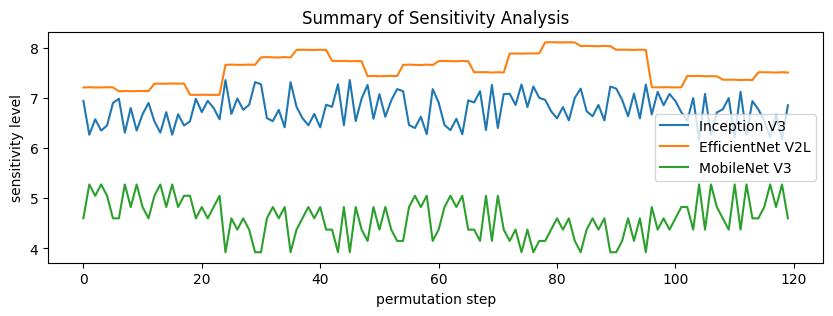

In [74]:
## PLOTTING RESULTS OF ANALYSIS
x=range(len(weights))
f, ax = plt.subplots(1,1, figsize=(10,3))
sns.lineplot(x=x, y=design1, ax = ax, label = 'Inception V3')
sns.lineplot(x=x, y=design2, ax = ax, label = 'EfficientNet V2L')
sns.lineplot(x=x, y=design3, ax = ax, label = 'MobileNet V3')
ax.set_ylabel('sensitivity level')
ax.set_xlabel('permutation step')
ax.set_title('Summary of Sensitivity Analysis')

In [75]:
## Creating radar graph

iterations = [str(i) for i in range(120)]

#design 1
data1=go.Scatterpolar(
      r=design1,
      theta=iterations,
      # fill='toself',
      name='Design 1: Inception V3',
)

#design 2
data2=go.Scatterpolar(
      r=design2,
      theta=iterations,
      # fill='toself',
      name='Design 2: EfficientNet V2'
)

#design 3
data3 = go.Scatterpolar(
      r=design3,
      theta=iterations,
      # fill='toself',
      name='Design 3: MobileNet V3'
)

datas = [data1,data2,data3]

# #customization of chart
# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[1, 10]
#     )),
#   showlegend=False
# )

layout = go.Layout(
        plot_bgcolor='rgba(0,0,0,0)',
        legend=dict(
            x=0,
            y=0.7,
            traceorder='normal',
            font=dict(
                size=12,),
        ),
    annotations=[
        dict(
            x=0,
            y=0.75,
            xref='paper',
            yref='paper',
            text='',
            showarrow=False
        )
    ],
    autosize=False,
    width=900,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig = go.Figure(data = datas, layout=layout)

fig.update_polars(radialaxis=dict(range=[0, 10]))

fig.show()

In [77]:
print("Average Score:")
print("Inception V3:", np.average(design1))
print("MobileNet V3:", np.average(design3))
print("EfficientNet V2:", np.average(design2))

Average Score:
Inception V3: 6.7660844656428845
MobileNet V3: 4.6
EfficientNet V2: 7.583261004339739
